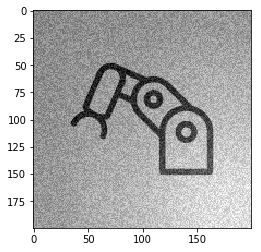

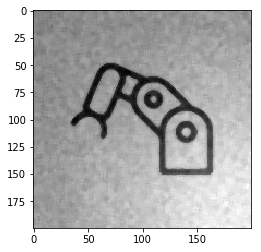

/home/asset/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log2


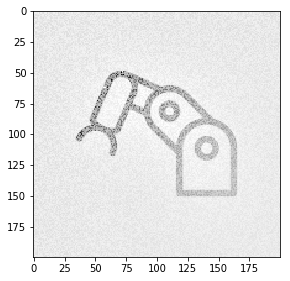

In [70]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.ndimage as ndimage
from scipy import ndimage as nimg
import numpy as np

im = img.imread('./data2/Arms/4.png')
plt.imshow(im, cmap="gray")
plt.show()

#salt-pepper
im_med = ndimage.median_filter(im, 5)
plt.imshow(im_med, cmap="gray")
plt.show()
#end salt-pepper

#light
gflt = nimg.gaussian_filter(im, sigma=20)
fig = plt.figure(figsize=(15,10))
plt.imshow((im-gflt),cmap='gray')
maxValue = (im-gflt).max();
minValue = (im-gflt).min();
sub = np.log2(im)-np.log2(gflt);
newImage = (sub-minValue)/(maxValue-minValue)
plt.subplot(131)
plt.imshow(newImage,cmap='gray')
plt.show()
#end light


In [46]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy import ndimage


In [72]:
from PIL import Image
import os, sys

path = "/data2/Arms/"
dirs = os.listdir(path)

def resizeArms():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((28,28), Image.ANTIALIAS)
            imResize.save(f + '_resized.png', 'PNG', quality=90)

resizeArms()

path = "/data2/Head/"
dirs = os.listdir(path)

def resizeHead():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((28,28), Image.ANTIALIAS)
            imResize.save(f + '_resized.png', 'PNG', quality=90)

resizeHead()

path = "/data2/Figure_normal_legs/"
dirs = os.listdir(path)

def resizeLegs():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((28,28), Image.ANTIALIAS)
            imResize.save(f + '_resized.png', 'PNG', quality=90)

resizeLegs()

path = "/data2/FigureWheels/"
dirs = os.listdir(path)

def resizeWheels():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((28,28), Image.ANTIALIAS)
            imResize.save(f + '_resized.png', 'PNG', quality=90)

resizeWheels()

In [58]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
folders = [
    r'data2//Arms//',
    r'data2//Figure_normal_legs//',
    r'data2//FigureWheels//',
    r'data2//Head//',
]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, 222))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)

data2//Arms2//
Full dataset tensor: (784, 28, 28)
Mean: 0.112809
Standard deviation: 0.143145
data2//Figure_normal_legs//
Full dataset tensor: (622, 28, 28)
Mean: 0.0883994
Standard deviation: 0.16318
data2//FigureWheels//
Full dataset tensor: (222, 28, 28)
Mean: 0.075104
Standard deviation: 0.165659
data2//Head//
Full dataset tensor: (473, 28, 28)
Mean: 0.0372736
Standard deviation: 0.201234


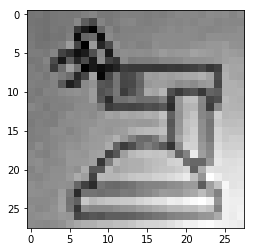

In [73]:
from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
plt.imshow(X_tests[0],cmap='gray')
plt.show()

In [74]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/4), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/8), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/16), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('sigmoid', name="sigmoid"))
model.summary()

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=50, 
          batch_size=10, 
          verbose=2, 
          validation_split=0.25,
          callbacks=callbacks)
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

(28, 28)
4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_8 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_9 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_10 (Dense)             (None, 49)                4851      
_________________________________________________________________
output (Dense)               (None, 4)                 200       

/home/asset/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_shape=(784,), activation="relu", kernel_initializer="uniform")`
/home/asset/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(392, activation="relu", kernel_initializer="uniform")`
/home/asset/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(196, activation="relu", kernel_initializer="uniform")`
/home/asset/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(98, activation="relu", kernel_initializer="uniform")`
/home/asset/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(49, activation="relu", kernel_initializer="uniform")`
/h

Train on 1181 samples, validate on 394 samples
Epoch 1/50
Epoch 00001: val_loss improved from inf to 0.40345, saving model to ./weights.net
 - 2s - loss: 0.5152 - acc: 0.7572 - val_loss: 0.4034 - val_acc: 0.7989
Epoch 2/50
Epoch 00002: val_loss improved from 0.40345 to 0.27382, saving model to ./weights.net
 - 2s - loss: 0.3460 - acc: 0.8374 - val_loss: 0.2738 - val_acc: 0.8934
Epoch 3/50
Epoch 00003: val_loss did not improve
 - 2s - loss: 0.2312 - acc: 0.8984 - val_loss: 0.2809 - val_acc: 0.9055
Epoch 00003: early stopping
526/526 [==============================] - 0s 153us/step
[0.29053524062887343, 0.89211026547979488]


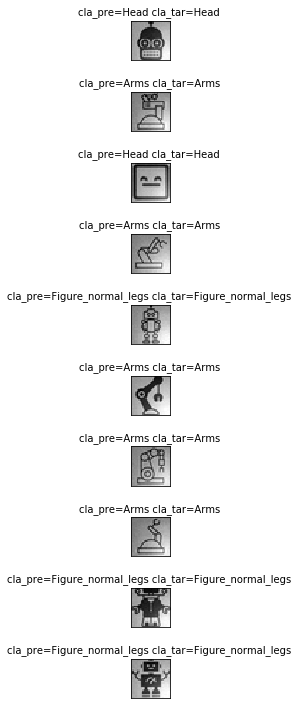

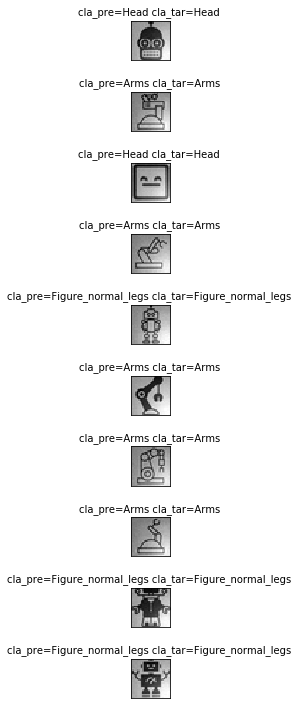

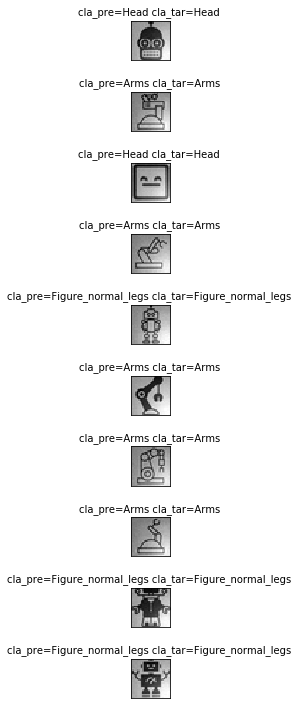

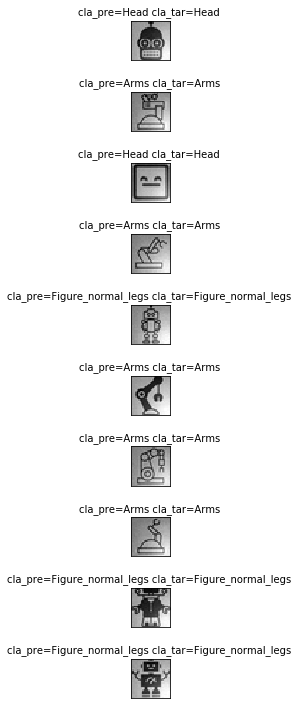

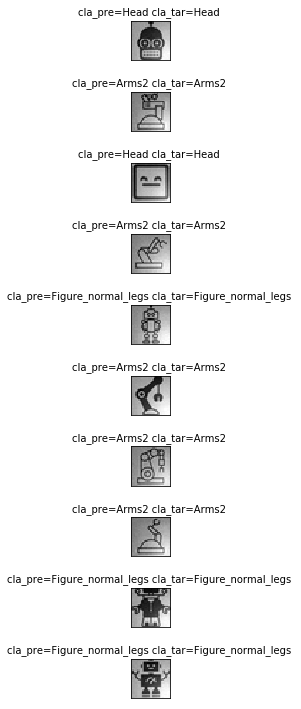

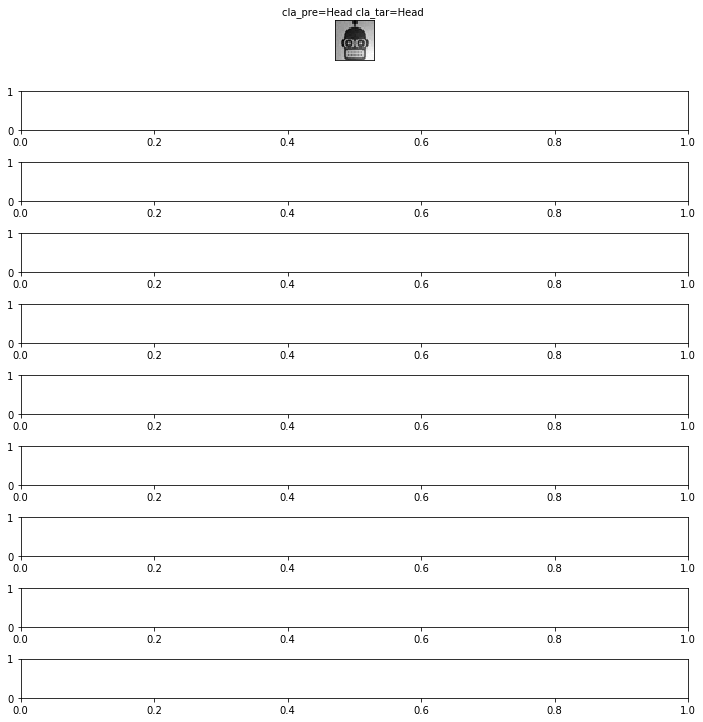

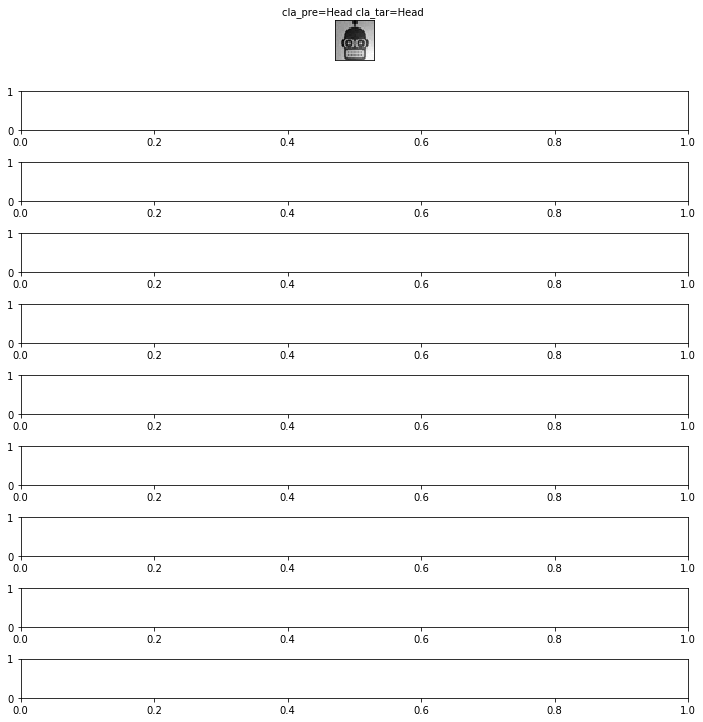

In [69]:
clazzez = ['Arms2','Figure_normal_legs','FigureWheels','Head']
results = model.predict(X_tests)
errors = list()
for idx in range(len(results)):
    res = results[idx]
    cla_pre = clazzez[np.argmax(res)]
    cla_tar = clazzez[np.argmax(Y_tests[idx])]
    if cla_pre==cla_tar:
#         print(cla_pre,cla_tar)
        errors.append(idx)
# print(errors)

problems = 10
fig, axes = plt.subplots(problems, figsize=(10,10))
fig.tight_layout()
for idx in range(problems):
    err = errors[idx]
    cla_pre = clazzez[np.argmax(results[err])]
    cla_tar = clazzez[np.argmax(Y_tests[err])]    
    
    axes[idx].imshow(X_tests[err],cmap='gray')
    axes[idx].set_title("cla_pre=%s cla_tar=%s " % (cla_pre,cla_tar), fontsize=10)
    axes[idx].set_xticks([]) 
    axes[idx].set_yticks([])
    plt.show()
    